
```
Author: Vishnu Ramkumar

Task 2: Prediction using Unsupervised ML
Problem: Predict the optimum number of clusters and represent it visually
Dataset used: Iris
#GRIP

```



In [30]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets

In [32]:
#loading data
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns= iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
#checking the dimensions of the dataset
data.shape

(150, 4)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [35]:
#describing the data
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
#checking for duplicate rows
data.duplicated().sum()

1

In [37]:
#checking for null values
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

No duplicate values present

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>]], dtype=object)

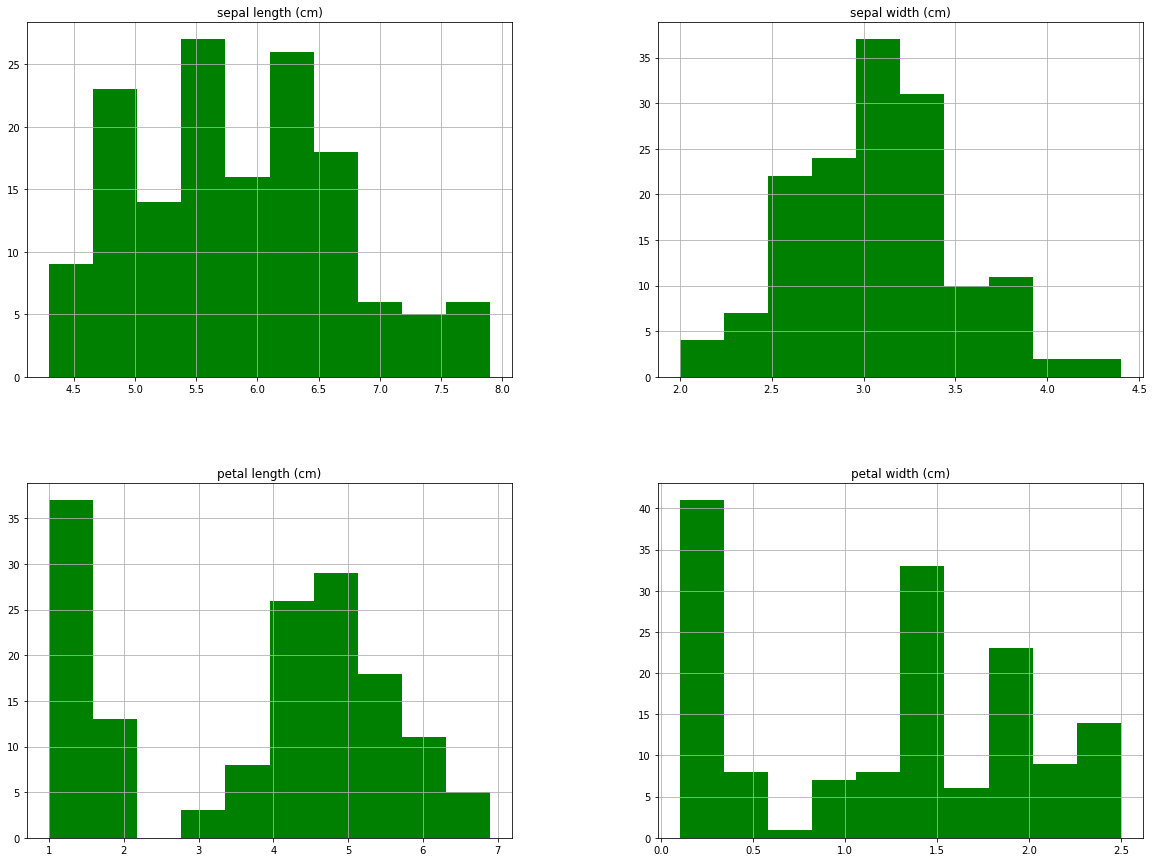

In [38]:
#visualization
data.hist(figsize=(20,15))

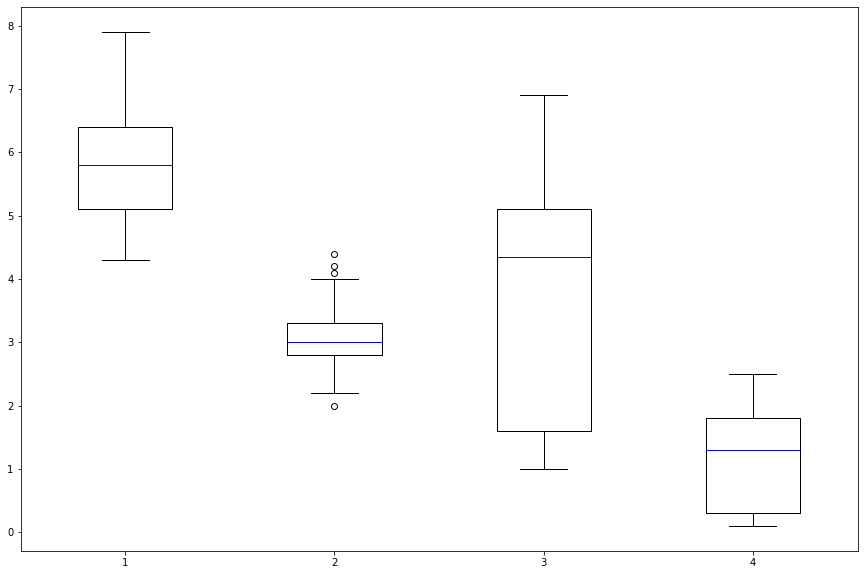

In [39]:
plt.figure(figsize=(15,10))
plt.boxplot(data)
plt.show()

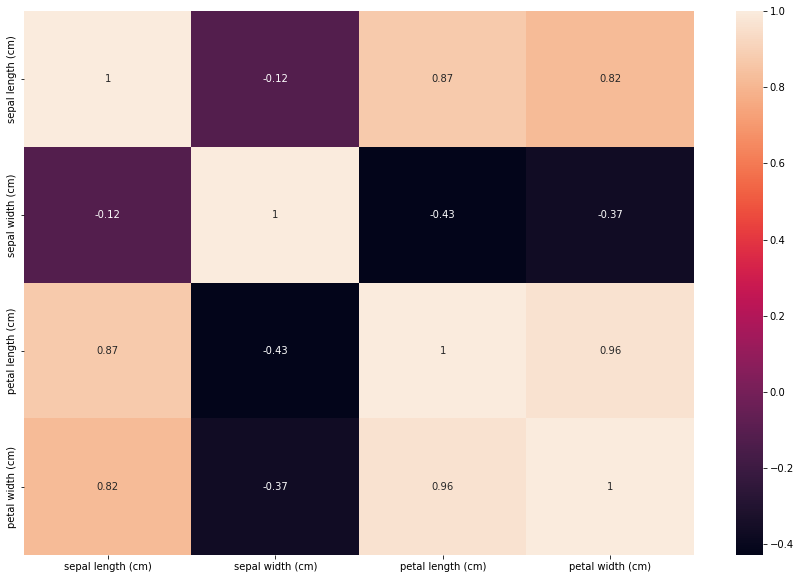

In [11]:
#corelation analysis
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

Algorithm used: K-means clustering

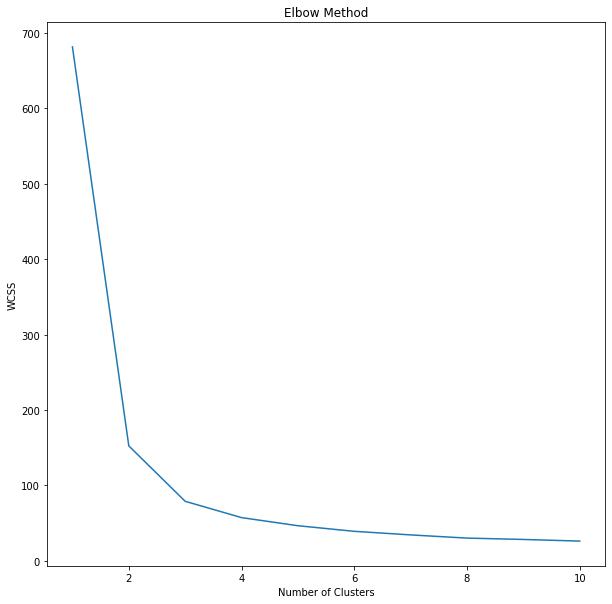

In [18]:
#elbow method to find the number of clusters
from sklearn.cluster import KMeans
wcss = []
x = iris.data
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,10))

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') #within cluster sum of spaces
plt.show()

The WCSS factor doesn't increase after 3, hence, we take 3 optimum number of clusters

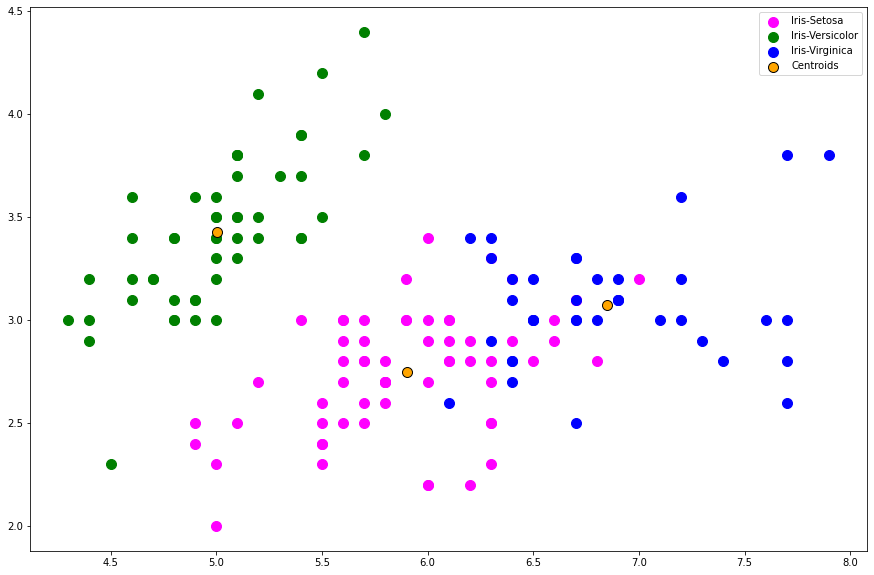

In [19]:
#kmeans
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means = kmeans.fit_predict(x)

plt.figure(figsize=(15,10))

#for clusters
plt.scatter(x[y_means == 0,0], x[y_means == 0,1], s=100, c='magenta', label='Iris-Setosa')
plt.scatter(x[y_means == 1,0], x[y_means == 1,1], s=100, c='green', label='Iris-Versicolor')
plt.scatter(x[y_means == 2,0], x[y_means == 2,1], s=100, c='blue', label='Iris-Virginica')

#for centroid
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='orange', label = 'Centroids', edgecolors = 'k')
plt.legend()

Thank you!